# **Capitulo 2: Problema 3**

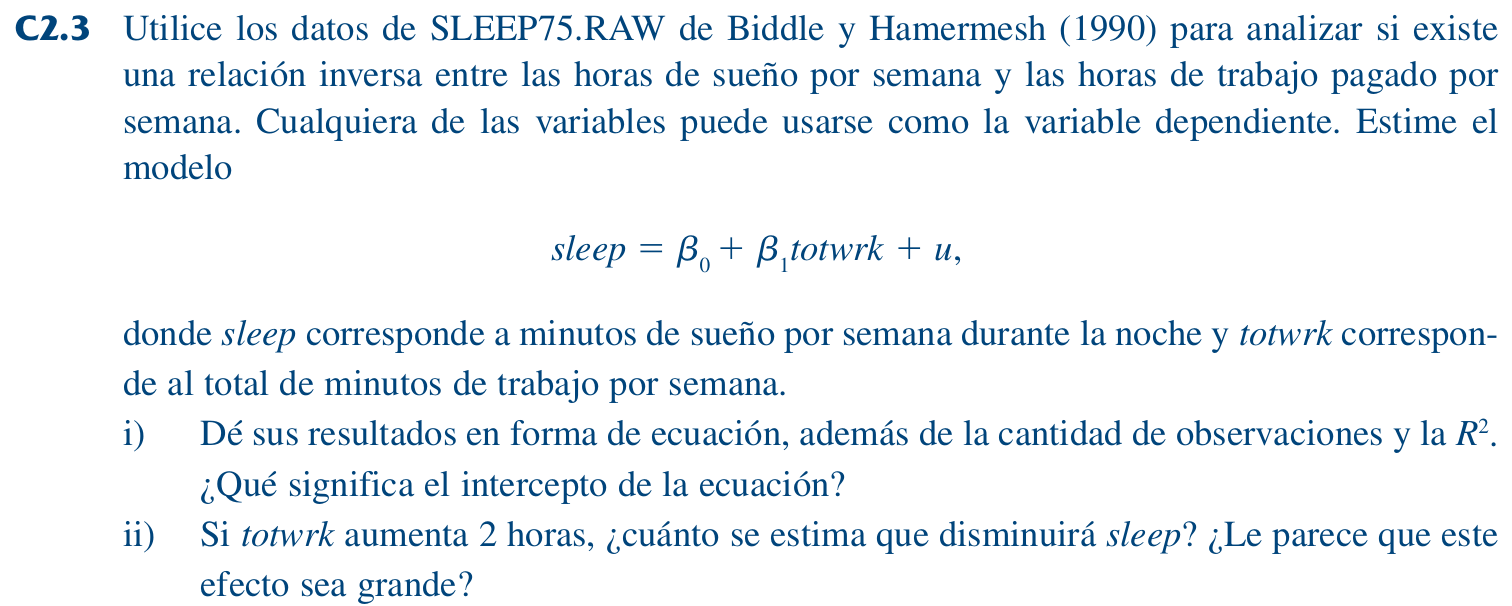

In [13]:
# Importar paquetes necesarios
import wooldridge as wd
import statsmodels.api as sm

In [14]:
# Cargar los datos del paquete wooldridge
data = wd.data('sleep75')

In [15]:
# Convertir horas de sueño diarias a minutos semanales
data['sleep'] = data['sleep'] # minutos por semana
data['totwrk'] = data['totwrk'] # Minutos de trabajo por semana

In [16]:
# Modelo: sleep = β0 + β1 * totwrk + u
X = data['totwrk']
y = data['sleep']
X = sm.add_constant(X)  # Agregar el término constante

In [17]:
# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     81.09
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           1.99e-18
Time:                        06:36:04   Log-Likelihood:                -5267.1
No. Observations:                 706   AIC:                         1.054e+04
Df Residuals:                     704   BIC:                         1.055e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3586.3770     38.912     92.165      0.0

La ecuación estimada es:

$$
\text{sleep} = 3586 - 0.15 \cdot \text{totwrk}
$$

**Significado del intercepto**:  
El intercepto 3586 representa el número de minutos de sueño por semana para alguien que no trabaja ($totwrk = 0$).


In [19]:
# Extraer resultados clave
intercept = model.params['const']
slope = model.params['totwrk']
r_squared = model.rsquared
n_obs = model.nobs

In [20]:
print("\nInterpretaciones:")
print(f"Ecuación estimada: sleep = {intercept:.2f} + ({slope:.4f}) * totwrk")
print(f"Número de observaciones: {int(n_obs)}")
print(f"R^2: {r_squared:.4f}")


Interpretaciones:
Ecuación estimada: sleep = 3586.38 + (-0.1507) * totwrk
Número de observaciones: 706
R^2: 0.1033


In [21]:
# Calcular el cambio en sleep si totwrk aumenta 2 horas (120 minutos)
change_in_sleep = slope * 120  # Cambio en minutos de sueño

Un aumento de 2 horas de trabajo equivale a $2 \times 60 = 120$ minutos. Según el modelo:

$$
\Delta \text{sleep} = \beta_1 \cdot \Delta \text{totwrk}
$$

$$
\Delta \text{sleep} = -0.15 \cdot 120 = -18
$$

Esto significa que si el tiempo de trabajo aumenta 2 horas por semana, se estima que el tiempo de sueño disminuirá en 18 minutos.

**¿Es grande este efecto?**  
Un cambio de 18 minutos de sueño semanal (aproximadamente 2.6 minutos por noche) es relativamente pequeño. Sin embargo, la percepción de si es grande o no depende del contexto y de las prioridades individuales entre trabajo y descanso.

In [22]:
print(f"Si totwrk aumenta en 2 horas, sleep disminuirá en {change_in_sleep:.2f} minutos.")

Si totwrk aumenta en 2 horas, sleep disminuirá en -18.09 minutos.
